In [1]:
import GrainSizing
import plotting
import helper

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = "F:/cellpose/fh/"

#optional filters for grain size measuring
filters= {
    'edge':[True,.1],
    'px_cutoff':[True,10]
    }
#optional properties for regionprops
properties=['label','area','centroid','major_axis_length','minor_axis_length']

## Measure grain sizes in labels/predictions

In [3]:
lbl_grains,lbl_res_props,lbl_IDs = GrainSizing.measure.batch_grainsize(PATH,filters=filters,properties=properties,mute=True,return_results=True)

F:/cellpose/fh//: 0file [00:00, ?file/s]
F:/cellpose/fh//train: 100%|██████████| 18/18 [00:02<00:00,  8.85file/s]


In [4]:
#get image-, label- and pred-paths
imgs,lbls,preds = helper.eval.dataset_loader([PATH],label_str='mask',pred_str='fh_pred')
_,_,preds_boosted = helper.eval.dataset_loader([PATH],label_str='mask',pred_str='boosted')
#set plot elements
elements= ['image','mask','ellipse_b','ellipse_a','ellipse']

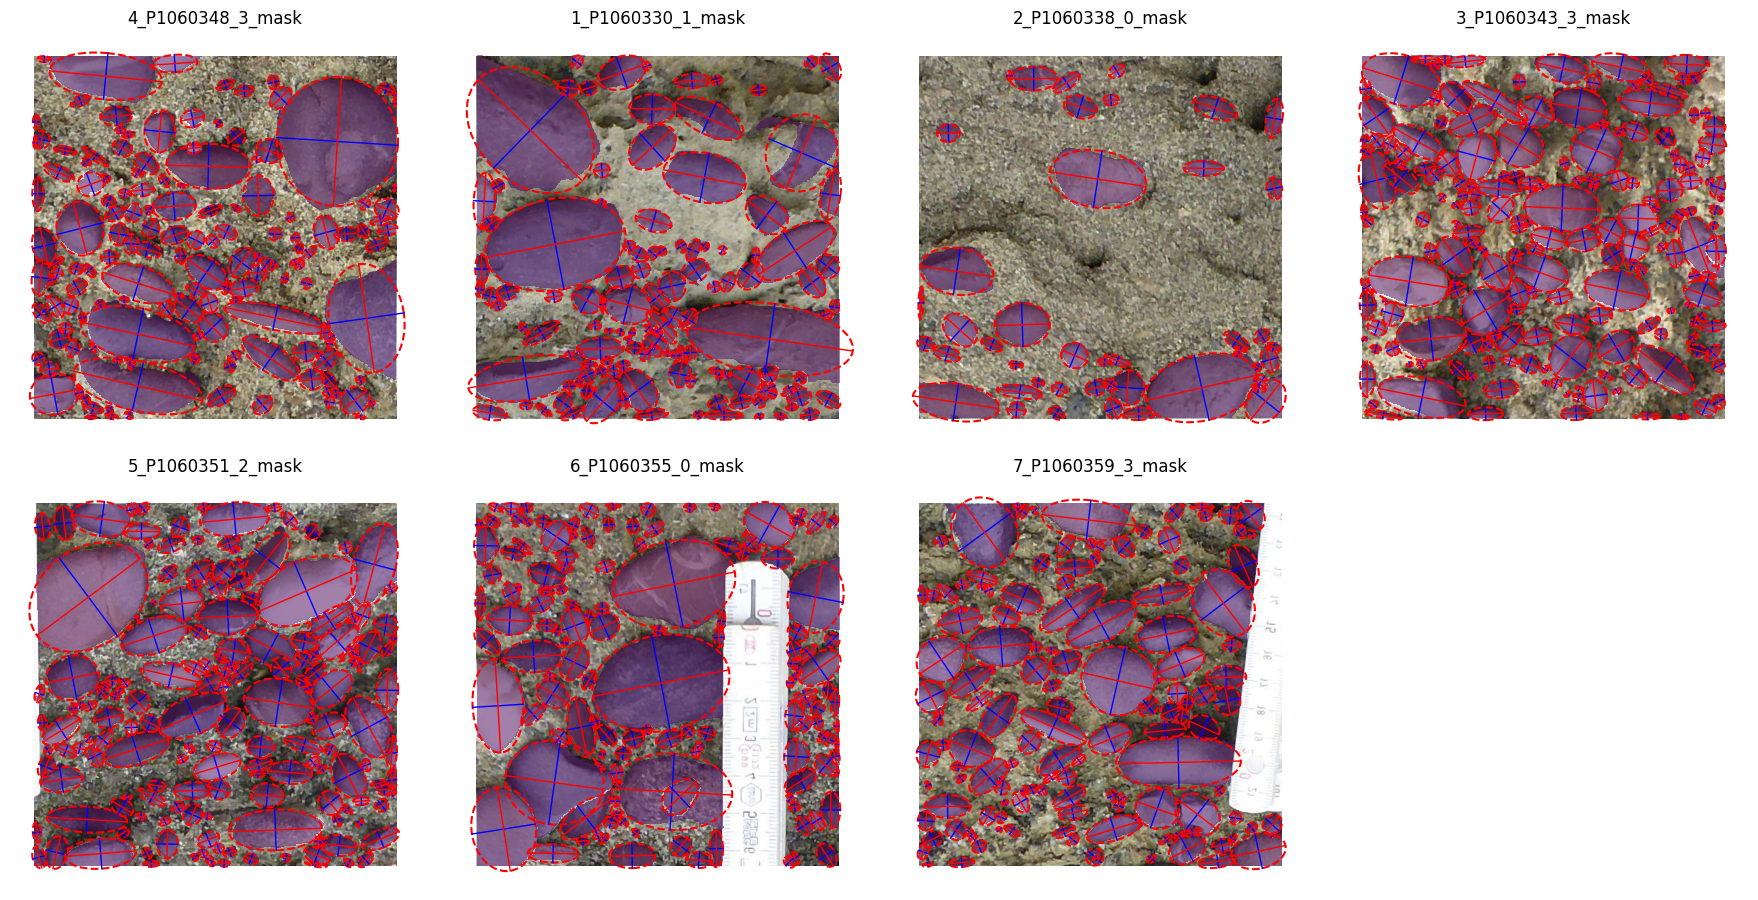

In [9]:
a = plotting.grains.inspect_dataset_grains(imgs,lbls);

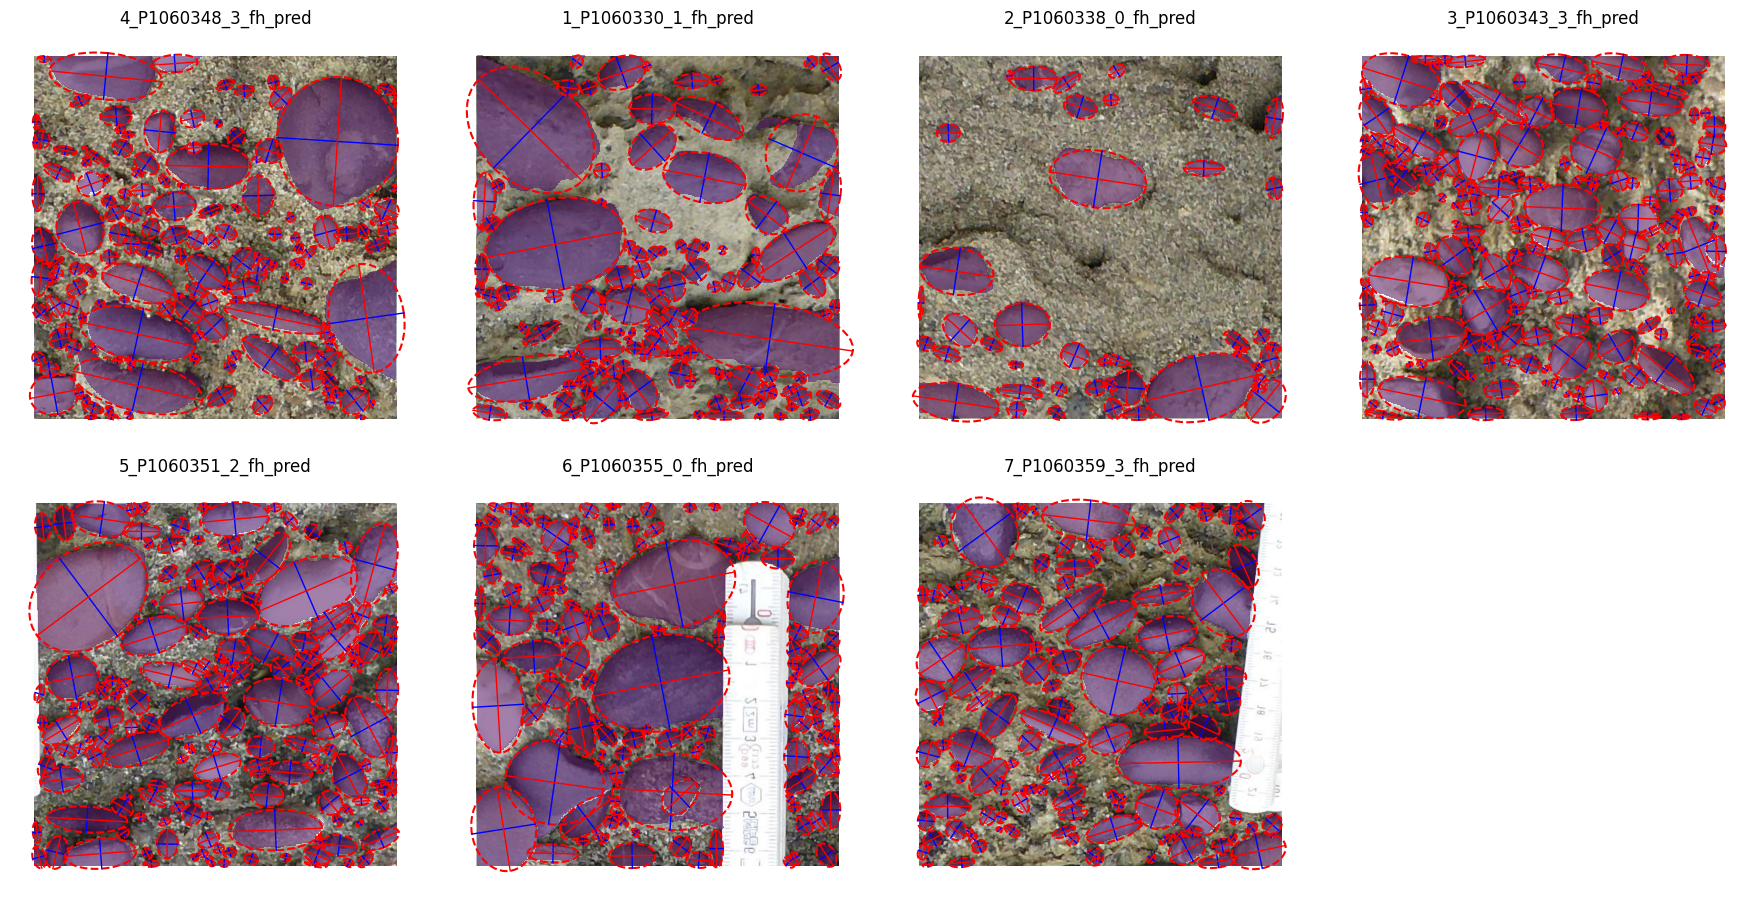

In [10]:
b = plotting.grains.inspect_dataset_grains(imgs,preds);

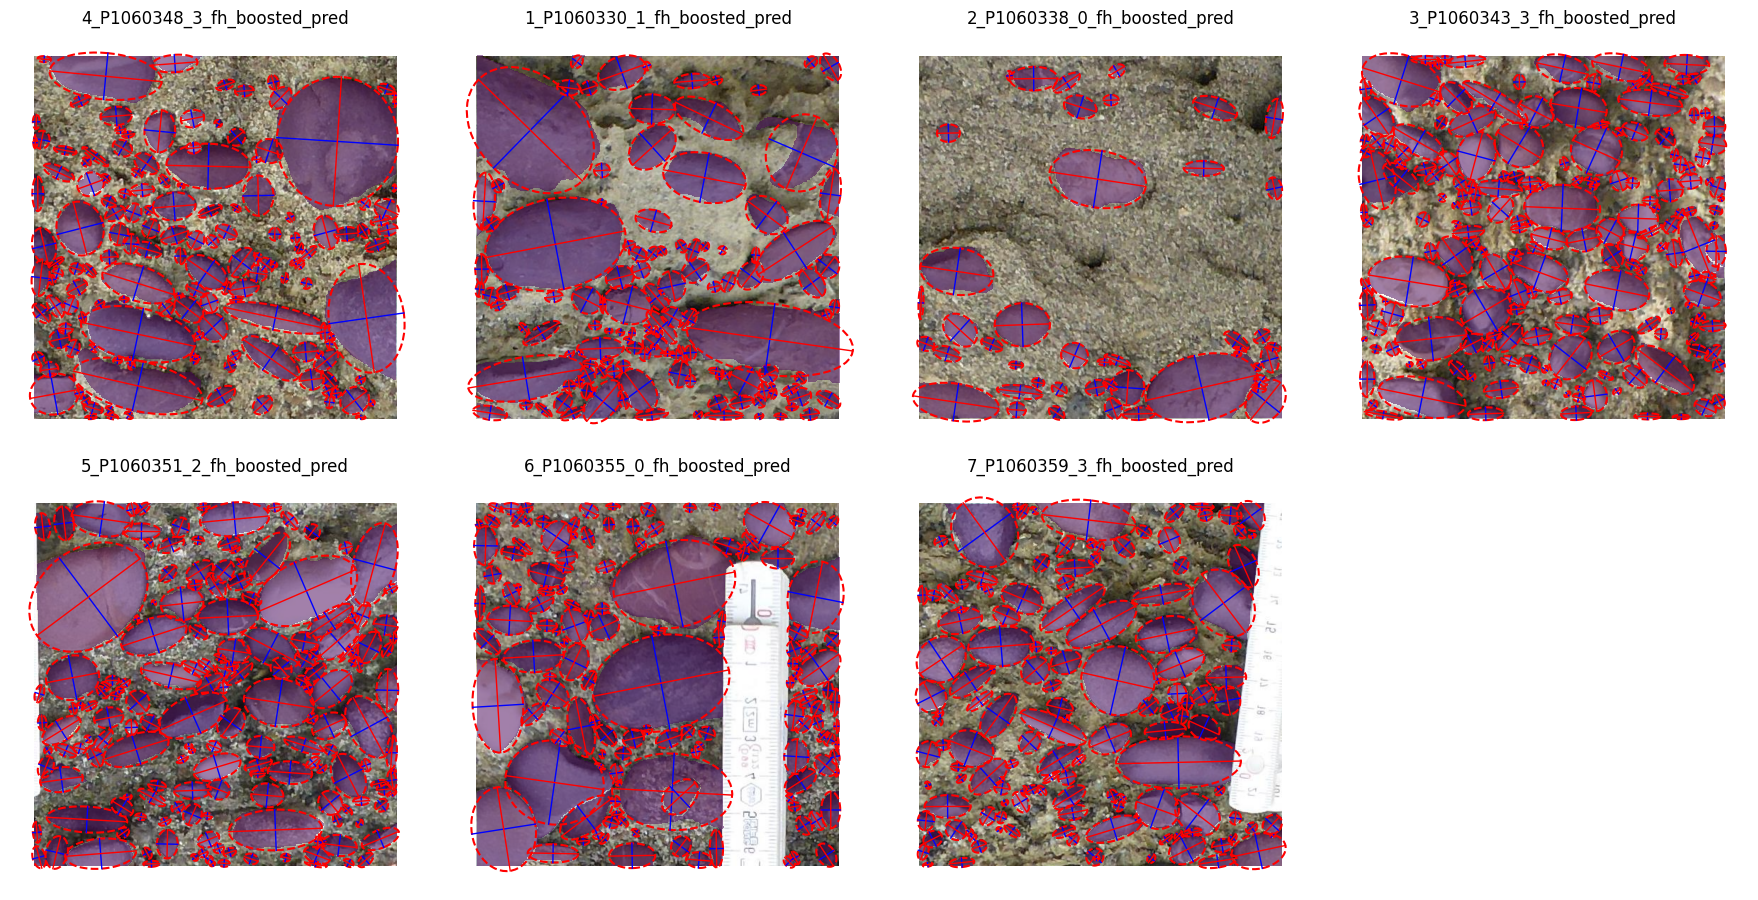

In [11]:
c = plotting.grains.inspect_dataset_grains(imgs,preds_boosted);

## Re-scale grain sizes with image resolution

In [12]:
camera_parameters = {
    'image_distance_m': [], 
    'focal_length_mm': [],
    'sensorH_mm': [],
    'sensorW_mm': [],
    'pixelsW':[],
    'pixelsH':[],
    }
resolution = 5

In [ ]:
GrainSizing.scale.re_scale_dataset([PATH],resolution=[1],gsd_str='_grains');